In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example 1: good versus bad guys dataset

In [2]:
url_train = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_train'
url_test = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_test'
train_data = pd.read_csv(url_train, index_col='name')
test_data = pd.read_csv(url_test, index_col='name')

In [3]:
# goal: identify characters as good or bad
train_data

,sex,mask,cape,tie,ears,smokes,class
name,,,,,,,
batman,0,1,1,0,1,0,good
robin,0,1,1,0,0,0,good
alfred,0,0,0,1,0,0,good
penguin,0,0,0,1,0,1,bad
catwoman,1,1,0,0,1,0,bad
joker,0,0,0,0,0,0,bad


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
tree = DecisionTreeClassifier()
X_train = train_data.drop('class',axis=1)
y_train = train_data['class']
tree.fit(X_train,y_train)

DecisionTreeClassifier()

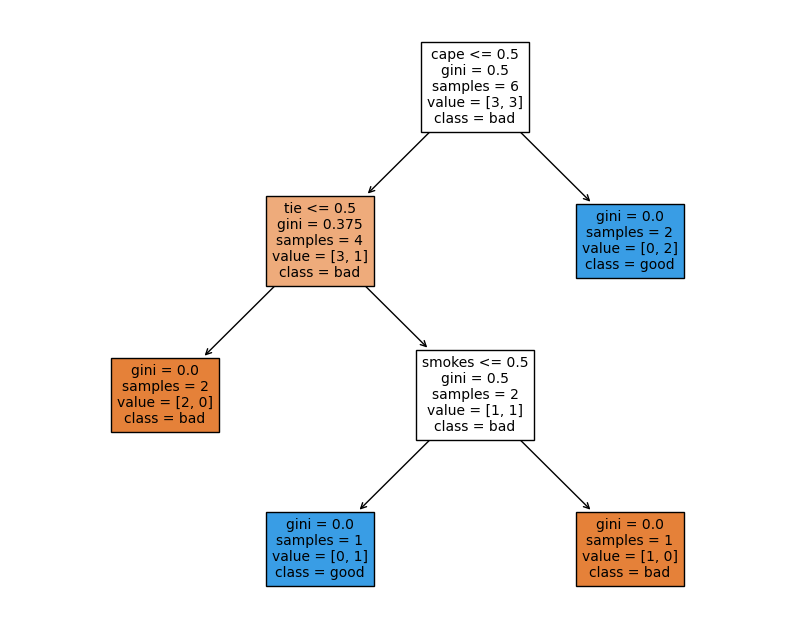

In [6]:
# plot the classification tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(tree,feature_names=X_train.columns,class_names=tree.classes_,filled=True, fontsize=10)
plt.show()

In [7]:
# test the model
y_pred = tree.predict(test_data)
pred_data = pd.DataFrame({'prediction':y_pred},index=test_data.index)
pred_data

,prediction
name,
batgirl,good
riddler,bad


The tree chooses the "question" that minimizes the Gini impurity.  The Gini impurity is a measure of how "pure" the resulting groups are.  A group is pure if all of its members are the same class.  For example, if all of the members of a group are good guys, then the group is pure.  If half of the members are good guys and half are bad guys, then the group is not pure.  The Gini impurity is a measure of how pure the resulting groups are.  The Gini impurity is defined as follows:

$$Gini = 1 - \sum_{i=1}^n p_i^2$$

All possible starting "questions" (based on features: [sex, mask, cape, tie, ears, smokes]): 

| Sex? | - | Mask? | - | Cape? | - | Tie? | - | Ears? | - | Smokes? | - |
|------|---|-------|---|-------|---|------|---|-------|---|---------|---|
| 0  | 1| 0   | 1| 0   | 1| 0  | 1| 0   | 1| 0     | 1|
| 3 good| 0 good| 1 good| 2 good| 1 good| 2 good| 2 good| 1 good| 2 good| 1 good| 3 good| 0 good|
| 1 bad| 1 bad| 2 bad| 1 bad| 3 bad| 0 bad| 2 bad| 1 bad| 2 bad| 1 bad| 2 bad| 1 bad|
| - | - | 0.44 | - | 0.25 | - | 0.5 | - | 0.5 | - | 0.4 | - |


<u>cape</u>
proportions:

Group0: 1 good, 3 bad: Pgood = 1/4, Pbad = 3/4

Group1: 2 good, 0 bad: Pgood = 2/2, Pbad = 0/2

Gini impurity: 

Pbad(1-Pbad) + Pgood(1-Pgood) OR

1 - (Pbad^2 + Pgood^2)

Gini(Group0)= 1 - (9/16 + 1/16) = 1 - (10/16) = 6/16 = 3/8 = 0.375

Gini(Group1) = 1 - (0/4 + 4/4) = 1 - (4/4) = 0

Scaled by number of members in group:

Gini(Group0) = 3/8 * 4/6 = 1/4

Gini(Group1) = 0 * 2/6 = 0

Combined Gini impurity:

Gini(cape) = 1/4 + 0 = 1/4 = 0.25

## Example 2: the pima indians diabetes dataset

If left unconstrained, decision trees will <b>overfit</b> the training data.  This is because the tree will keep splitting until each leaf node is pure.  To prevent overfitting, we can limit the depth of the tree, or the number of samples required to split a node, or the minimum number of samples required to be at a leaf node.  These are all hyperparameters that can be tuned to improve the performance of the model.

In [8]:
pima_data = pd.read_csv('https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv')
pima_data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# feature matrix X, target vector y
X = pima_data.drop('label',axis=1)
y = pima_data['label']

In [10]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

An overfitted model:
- performs well on the training data
- performs poorly on the test data

In [11]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score

print('train accuracy:',accuracy_score(y_train,y_train_pred))
print('test accuracy:',accuracy_score(y_test,y_test_pred))

train accuracy: 1.0
test accuracy: 0.7395833333333334


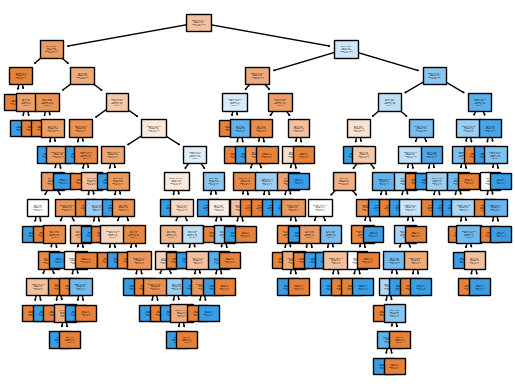

In [14]:
plot_tree(tree,feature_names=X_train.columns,class_names=['0', '1'],filled=True, fontsize=1)
plt.show()

We need to restrict the complexity of the model to prevent overfitting.

The `Max Depth` hyperparameter

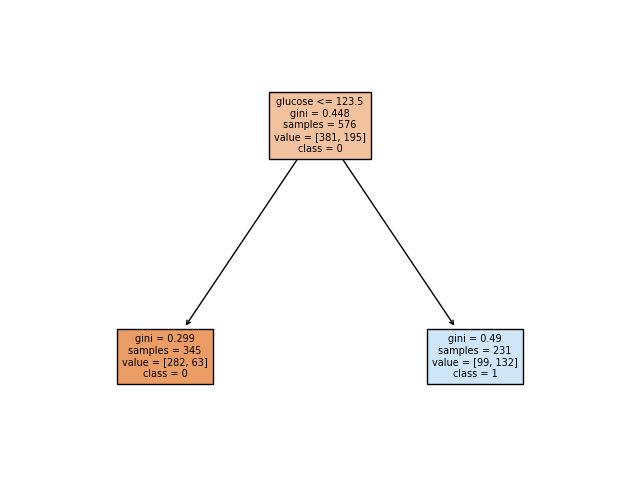

In [25]:
tree = DecisionTreeClassifier(max_depth=1) # max_depth=1 means that the tree will have only one split
tree.fit(X_train,y_train)
# plot the tree
plt.figure(figsize=(8,6))
plot_tree(tree,feature_names=X_train.columns,class_names=['0', '1'],filled=True, fontsize=7)
plt.show()

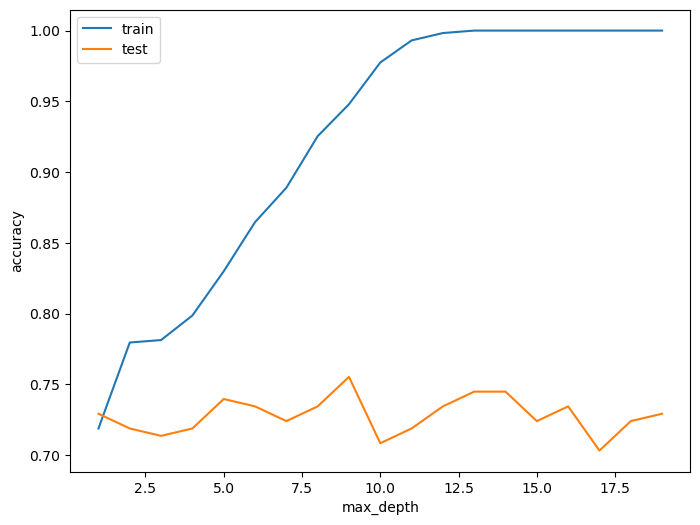

In [30]:
# a loop to plot accuracy vs max_depth
train_accuracy = []
test_accuracy = []
for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test,y_test_pred))

plt.figure(figsize=(8,6))
plt.plot(range(1,20),train_accuracy,label='train')
plt.plot(range(1,20),test_accuracy,label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Other helpful hyperparams for trees:
- `min_samples_split`: the minimum number of samples required to split an internal node (ex. with min_samples_split=5, a node with 4 samples will not be split, it will just stay as a leaf node)
- `min_samples_leaf`: the minimum number of samples required to be at a leaf node (ex. with min_samples_leaf=5, a leaf node with 4 samples will not be created)

### Grid Search for tree hyperparameters

{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
train accuracy: 0.78125
test accuracy: 0.7135416666666666


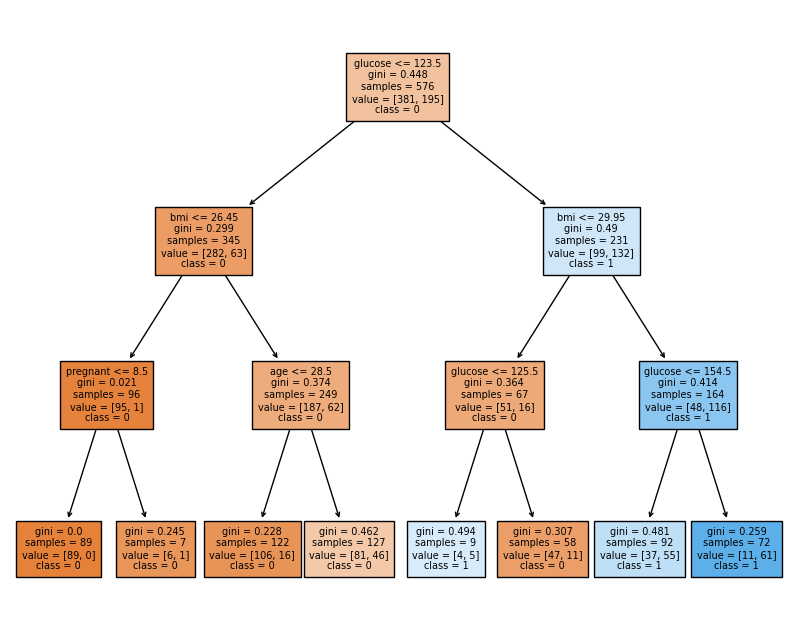

In [39]:
# param grid
param_grid = {'max_depth':range(1,20), 'min_samples_leaf':range(1,10), 'min_samples_split':range(2,10)}

# # grid search
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train,y_train)

# # best parameters
print(grid.best_params_)

# # best estimator
tree = grid.best_estimator_

# train accuracy
y_train_pred = tree.predict(X_train)
print('train accuracy: {}'.format(accuracy_score(y_train,y_train_pred)))

# test accuracy
y_test_pred = tree.predict(X_test)
print('test accuracy: {}'.format(accuracy_score(y_test,y_test_pred)))

# plot the tree
plt.figure(figsize=(10,8))
plot_tree(tree,feature_names=X_train.columns,class_names=['0', '1'],filled=True, fontsize=7)
plt.show()

## Example 3: two moons dataset

Polynomial features are (in theory) unnecessary for decision trees.  However, they can be useful for visualizing the decision boundaries.

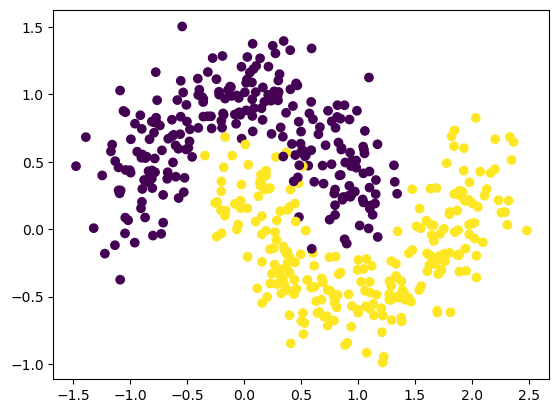

In [52]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

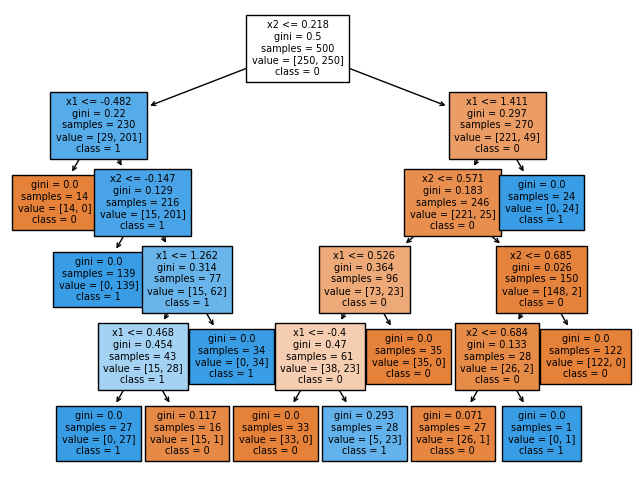

In [56]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X,y)

plt.figure(figsize=(8,6))
plot_tree(tree,feature_names=['x1','x2'],class_names=['0', '1'],filled=True, fontsize=7)
plt.show()

In [58]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 16 14:29:00 2021
Updated on Tue Oct 19 09:00:00 2021

@author: javier.perez-alvaro
"""
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

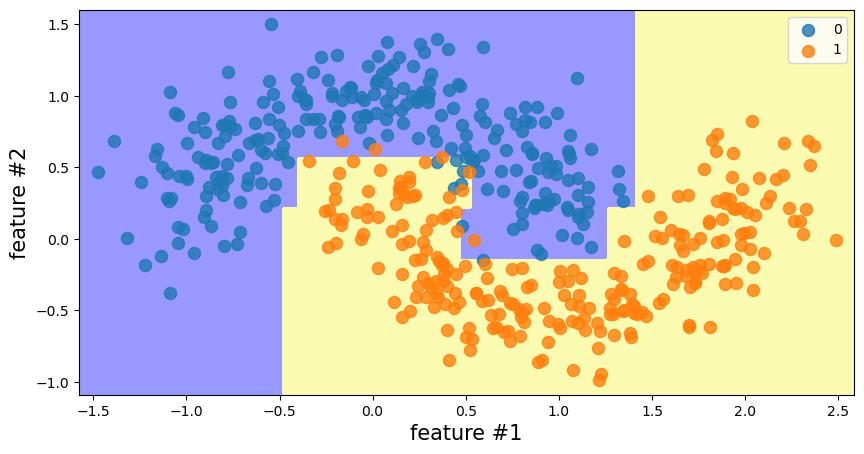

In [59]:
draw_classification_regions(X,y,tree)